<a href="https://colab.research.google.com/github/kevindmzapata/deep-learning-project/blob/main/03_autoencoder_con_regresor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Autoencoder con Regresor SVM o Red Neuronal

## I. Importar librerias necesarias

In [1]:
!wget -nc --no-cache -O database.zip -q https://raw.githubusercontent.com/kevindmzapata/deep-learning-project/main/database.zip
!unzip -n -q database.zip
!rm database.zip
!wget -nc --no-cache -O utils.py -q https://raw.githubusercontent.com/kevindmzapata/deep-learning-project/main/resources/utils.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from utils import load_data

## II. Cargar imagenes

In [3]:
images, labels, ch_spacing = load_data('database')

In [4]:
print("Las dimensiones de la base de datos son: ", images.shape, labels.shape, ch_spacing.shape)

Las dimensiones de la base de datos son:  (729, 32, 32) (729,) (729,)


## III. Generar modelo del autoencoder

In [5]:
# Modelo autoencoder
def autoencoder(input_dim, encoding_dim):
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation='relu', dtype=np.float32, name="encoder")(input_layer)
    decoder = Dense(input_dim, dtype=np.float32, name="decoder")(encoder)
    model = Model([input_layer], [decoder])
    model.compile(optimizer='adam', loss='mae')
    return model

In [6]:
X = images.reshape(images.shape[0], images.shape[1] * images.shape[2]) / 255.0
y = labels.reshape(labels.shape[0], 1)
ch = np.eye(len(np.unique(ch_spacing)))[ch_spacing]

In [7]:
model = autoencoder(input_dim=X.shape[1], encoding_dim=256)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 1024)                │         263,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,568 (2.00 MB)

 Trainable params: 525,568 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(X, X, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1026
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354 
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0314
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0286
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0265
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0263
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0259
Epoch 13/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0251
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0256
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0260
Epoch 16/30
46/46

In [9]:
X_sample = np.random.permutation(X)[:10]
X_pred_sample   = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


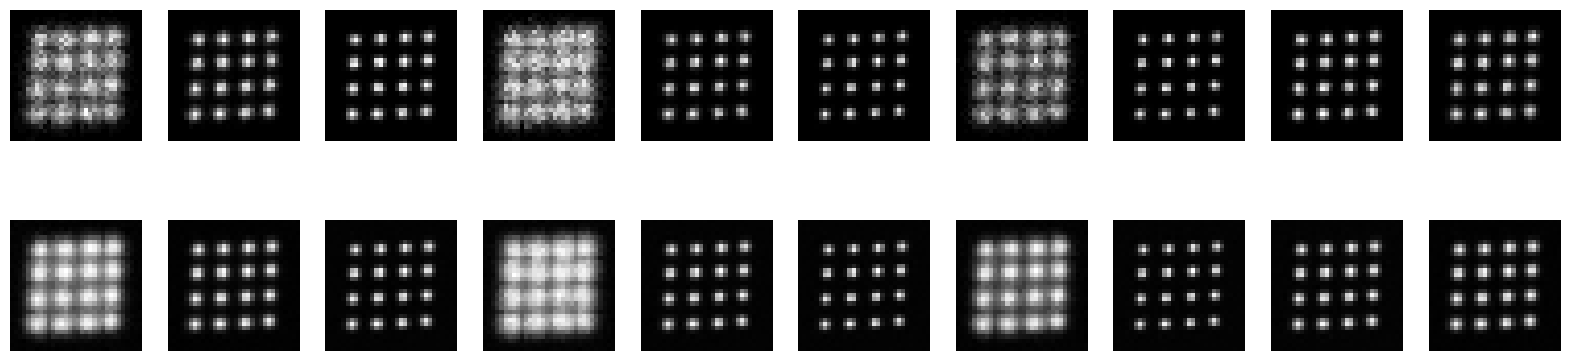

In [10]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(32, 32), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred_sample[i].reshape(32, 32), cmap=plt.cm.Greys_r)
    plt.axis("off")

In [11]:
layer_encoder = model.get_layer("encoder")

m = tf.keras.Model(inputs=model.input, outputs=layer_encoder.output)
m.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 256)                 │         262,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,400 (1.00 MB)

 Trainable params: 262,400 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
X_encoded = m.predict(X)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [13]:
X_encoded.shape, y.shape

((729, 256), (729, 1))

## IV. Generar modelo de Deep Learning



In [14]:
def create_model(input_dim, output_dim, extra_feat_dim=None, activation='relu', reg=False):
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, concatenate

    input_0 = Input(shape=(input_dim,), name='input_0')
    x = Dense(512, activation=activation, name='dense_0')(input_0) if not reg else Dense(512, activation=activation, name='dense_0', kernel_regularizer='l2')(input_0)
    x = Dense(256, activation=activation, name='dense_1')(x) if not reg else Dense(256, activation=activation, name='dense_1', kernel_regularizer='l2')(x)
    x = Dense(128, activation=activation, name='dense_2')(x)
    x = Dense(64, activation=activation, name='dense_3')(x)
    x = Dense(32, activation=activation, name='dense_4')(x)
    inputs = [input_0]

    if extra_feat_dim is not None:
        input_1 = Input(shape=(extra_feat_dim,), name='input_1')
        x = concatenate([x, input_1], name='concat_0')
        inputs = [input_0, input_1]

    output = Dense(output_dim, name='out_0')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mae')

    return model

In [15]:
model = create_model(input_dim=X_encoded.shape[1], output_dim=1, extra_feat_dim=ch.shape[1])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_0 (InputLayer)      │ (None, 256)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_0 (Dense)           │ (None, 512)            │        131,584 │ input_0[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ dense_0[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_1 (InputLayer)      │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat_0 (Concatenate)    │ (None, 40)             │              0 │ dense_4[0][0],         │
│                           │                        │                │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ out_0 (Dense)             │ (None, 1)              │             41 │ concat_0[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 306,185 (1.17 MB)

 Trainable params: 306,185 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
kf = KFold(n_splits=5, shuffle=True)
kf_scores = []
kf_histories = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ch_train, ch_test = ch[train_index], ch[test_index]

    scaler = MinMaxScaler(feature_range=(0, 1)).fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    model = create_model(X_train.shape[1], y_train.shape[1], extra_feat_dim=ch_train.shape[1], reg=True)
    history = model.fit([X_train, ch_train], y_train, epochs=500, batch_size=16, validation_data=([X_test, ch_test], y_test), verbose=0)

    y_pred = model.predict([X_test, ch_test])
    preds = scaler.inverse_transform(y_pred)
    y_true = scaler.inverse_transform(y_test)

    kf_scores.append(mean_absolute_error(y_true, preds))
    kf_histories.append(history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


In [17]:
print(f'El MAE promedio es: {np.mean(kf_scores):.4f} dB')

El MAE promedio es: 1.4121 dB


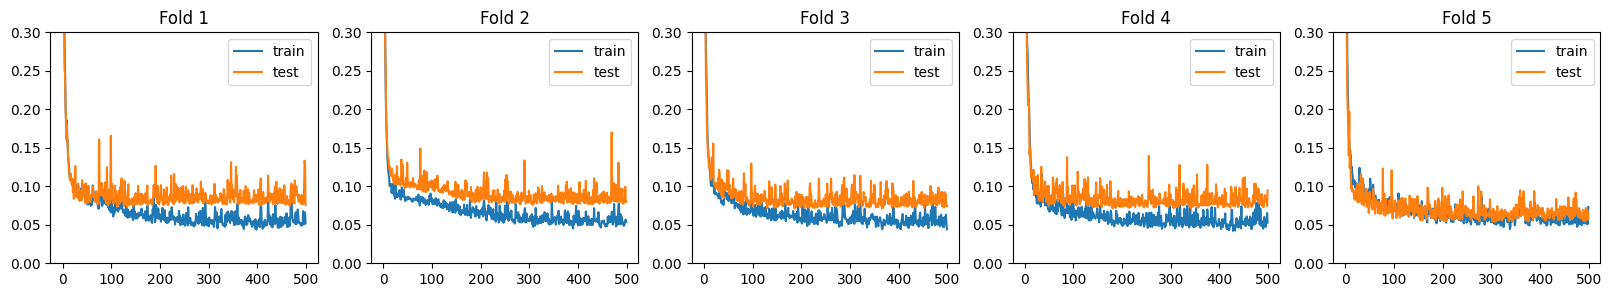

In [18]:
plt.figure(figsize=(20, 3))

for i in range(len(kf_histories)):
    plt.subplot(1, 5, i+1)
    plt.plot(kf_histories[i].history['loss'], label='train')
    plt.plot(kf_histories[i].history['val_loss'], label='test')
    plt.ylim([0, 0.3])
    plt.title('Fold ' + str(i+1))
    plt.legend()
plt.show()

Con respecto al modelo puramente con capas densas, el MAE redujo un poco usando el modelo con autoencoder, pero no es tan significativo.